In [1]:
import sys
import os
from pathlib import Path
from glob import glob

In [2]:
sys.path.append('..')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [4]:
from experiments.eval_features import eval_features

In [5]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
PATH_RESULTS = os.path.join(PATH_ROOT, 'results', 'exp643896')
PATH_OUTPUT = os.path.join(PATH_RESULTS, 'roc')

print(PATH_RESULTS)

/home/lukec/workspace/baard_v4/results/exp643896


In [6]:
# SCALE_LIST = np.concatenate([np.arange(10, 100, 10), np.arange(100, 1100, 100)]).astype(float)
SCALE_LIST = np.arange(10, 100, 10).astype(float)

In [7]:
def eval_scale(detector_name,
           data_name='MNIST',
           attack_name='APGD-inf',
           eps='0.22',
           path_output=PATH_OUTPUT,
           scale_list=SCALE_LIST):
    path_input = os.path.join(PATH_RESULTS, data_name, detector_name, attack_name)

    _detector_name = detector_name.split('_')[0]
    files_adv = [f'{_detector_name}-{scale}-{data_name}-{attack_name}-{eps}.pt' for scale in scale_list]
    files_clean = [f'{_detector_name}-{scale}-{data_name}-{attack_name}-clean.pt' for scale in scale_list]

    df_auc_all = pd.DataFrame()
    for file_clean, file_adv in zip(files_clean, files_adv):
        _, df_auc_tpr = eval_features(path_input, path_output, file_clean, file_adv)
        df_auc_all = pd.concat([df_auc_all, df_auc_tpr], ignore_index=True)
    df_auc_all['scale'] = scale_list

    df_sn_plot = df_auc_all.melt('scale', var_name='cols', value_name='rate')
    sn.lineplot(data=df_sn_plot.query(('cols == "auc" | cols == "5fpr"')), x='scale', y='rate', hue='cols')

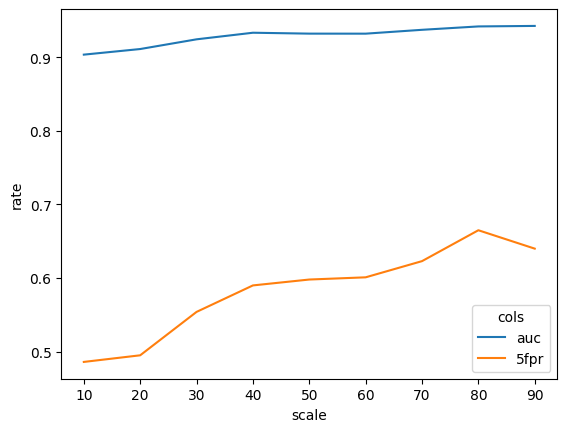

In [8]:
detector_name = 'ReliabilityStage_tuneScale'
eval_scale(detector_name, 'MNIST', 'APGD-inf', eps='0.22')
# eval_scale(detector_name, 'MNIST', 'APGD-2', eps='4.0')
# eval_scale(detector_name, 'CIFAR10', 'APGD-inf', eps='0.01')
# eval_scale(detector_name, 'CIFAR10', 'APGD-2', eps='0.3')

In [ ]:
# detector_name = 'DecidabilityStage_tuneScale'
# eval_scale(detector_name, 'MNIST', 'APGD-inf', eps='0.22')
# eval_scale(detector_name, 'MNIST', 'APGD-2', eps='4.0')
# eval_scale(detector_name, 'CIFAR10', 'APGD-inf', eps='0.01')
# eval_scale(detector_name, 'CIFAR10', 'APGD-2', eps='0.3')